# Abstract:

#### Background:

In March 2020, the World Health Organization (WHO) declared COVID-19 a pandemic, caused by the novel SARS-CoV-2 virus. Following the call from the WHO to immediately assess available data to learn what care approaches are most effective and evaluate the effects of therapies, this collection aims to report on original peer-reviewed research articles in methodological approaches to medical research related to COVID-19. As stated in NEXOID's official webpage, this data has been accumulated from their web-based self-reported survey since 25th of March 2020.

#### Method:

Extracted from the raw available data from NEXOID-UK of global respondents reporting their COVID-19 status along with other medical conditions. Such comorbidities as asthma, liver disease, lung disease, diabetes, kidney disease and hypertension will be discussed with other daily living aspects to provide the clear understanding of what elements cause the rash of the epidemic. This paper will introduce an informative outlook of the viral disease by applying Exploratory Data Analysis, in addition to optimizing logistic regression and association rules on given risk facts as independent univeriate and multivariate variables  

#### Result

The result of our exploration will be demonstrated in the  Section 4 (task 4) in this report. The final findings are essential to the future feature selection that might accelerates the data modeling for next assignment. 

## Preparation Step: 

##### A crucial stage faciliating the future exploratory data process is the Preparation. To smoothen the course of profound data insight exploitation, built-in Python libraries are indispensible tools to assist the better analysis. Hence, installing specific packages must be preceded for  future implementation.

In [1]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=226c4d3b968319bd5fa68a4bfe174d27fe4d1dd260e2e6e183790f5dd59a60e6
  Stored in directory: C:\Users\n10648771\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly as py
py.offline.init_notebook_mode(connected=True)
import folium

In [4]:
df=pd.read_csv(r'Documents/D1.csv')

### TASK 1

Examine data variables:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
survey_date               5111 non-null object
region                    1485 non-null object
country                   5109 non-null object
ip_latitude               5111 non-null float64
ip_longitude              5111 non-null float64
ip_accuracy               5111 non-null int64
sex                       5111 non-null object
age                       5111 non-null object
height                    5111 non-null int64
weight                    5111 non-null int64
bmi                       5111 non-null float64
blood_type                5111 non-null object
insurance                 3943 non-null object
income                    3943 non-null object
race                      3943 non-null object
immigrant                 3943 non-null object
smoking                   5072 non-null object
contacts_count            5065 non-null float64
house_count               5111 non-null int64


By comparing to the dataset description provided, such variables are considered for datatype correction: Survey_date, Contacts_count, Public_transport_count,Worried.
To be more specific:
- 'survey_date' as described in the assessment specification: it is a collection of dates recording data from the website, therefore, the most suitable datatype for this variable is Datetime. 
- 'contacts_count','public_transport_count','worried' should be converted to integer datatype due to these factors indicates the number of people and the level of individual concern about the pandemic. Hence, based on conventional logics, it should not be in 'float' type. 

In [6]:
#Convert 'survey_date' datatype:
#Alternatively, we can impute the type for this column when importing the csv by using: df=pd.read_csv(r'Downloads/D1.csv',parse_dates=['survey_date'])
df['survey_date']=pd.to_datetime(df['survey_date'])

In [7]:
#Accordingly, we use proper function to convert other variables into integers (astype): 
df['contacts_count']=df.contacts_count.astype('Int64')
df['public_transport_count']=df.public_transport_count.astype('Int64')
df['worried']=df.worried.astype('Int64')

#### After conversion, we gonna check it again to ensure our correct datatype has been placed:
#### Note that 'Int64' is a nullable datatype for integers

In [124]:
df.describe()

,ip_latitude,ip_longitude,ip_accuracy,height,weight,bmi,contacts_count,house_count,public_transport_count,worried,...,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality,z1,ip_transform
count,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5065.000000,5111.000000,3943.000000,3943.000000,...,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5.111000e+03,5111.000000
mean,32.632466,-62.937803,95.045001,171.915085,83.771082,28.269086,7.541757,2.998630,0.343393,3.541973,...,0.084524,0.004109,0.181569,0.071023,0.009000,0.061436,44.264527,0.897149,-3.322415e-17,0.094139
std,20.998744,56.111774,218.290167,10.986410,23.160159,7.574553,6.567721,1.673495,1.574551,0.769603,...,0.278199,0.063974,0.385527,0.256889,0.094451,0.240152,43.965175,2.803912,1.000098e+00,0.218509
min,-45.844200,-159.393400,1.000000,110.000000,44.000000,11.900000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.050000,-4.308678e-01,0.000000
25%,32.686700,-96.795500,5.000000,164.000000,68.000000,23.300000,3.000000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.050000,-4.125418e-01,0.004004
50%,39.003400,-80.151100,10.000000,172.000000,80.000000,26.500000,5.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.194000,-3.896342e-01,0.009009
75%,42.549350,-47.889000,50.000000,180.000000,94.000000,31.200000,10.000000,4.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.742000,-2.063740e-01,0.049049
max,63.668200,174.775800,1000.000000,238.000000,180.000000,125.000000,21.000000,11.000000,15.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,75.000000,4.146057e+00,1.000000


### TASK 2

###### 1. Identify and report the skewness present in the variables:

In [9]:
#Import skew package for measuring skewness distribution of our variables
from scipy.stats import skew
import pylab as p 

In [10]:
df.skew()

ip_latitude               -2.087471
ip_longitude               1.652506
ip_accuracy                3.157092
height                    -0.444816
weight                     1.203467
bmi                        2.205616
contacts_count             1.001026
house_count                1.777352
public_transport_count     6.091561
worried                   -0.301183
covid19_positive           0.557063
covid19_symptoms           2.354682
covid19_contact            2.369179
asthma                     2.284441
kidney_disease             7.964242
liver_disease             10.175924
compromised_immune         3.605102
heart_disease              4.768362
lung_disease               6.159167
diabetes                   2.988074
hiv_positive              15.508909
hypertension               1.652573
other_chronic              3.341092
nursing_home              10.401023
health_worker              3.653815
risk_infection             0.406947
risk_mortality            13.180574
dtype: float64

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010). SPSS for Windows Step by Step: A Simple Guide and Reference, 17.0 update (10a ed.) Boston: Pearson. As a general rule of thumb:

- If skewness is less than -2 or greater than 2, the distribution is highly skewed.
- If skewness is between -2 and -1 or between 1 and 2, the distribution is moderately skewed.
- If skewness is between -1 and 1, the distribution is approximately symmetric.

Our paper will only visualize the highly skewed distribution variables to have the general view of dataset: 


In [11]:
df_highskewness=df[df.skew()[df.skew()>2].index]

We do not include df.skew()<-2 because there is only ip_latitude satisfies that, however, ip_latitude and ip_longitude are not appropriate for verifying distribution

In [12]:
len(df_highskewness.columns)

17

##### 2. Identify data errors and inconsistencies

Data errors include **outliers, null values, discrepancies, noises**. For each data issues, we need to compute different techniques to correctly identify the problems in order to provide effective solutions for future model building
- As we can see from the below table, the dataset has a significant problems of missing values. 

In [13]:
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 5111
Number of attributes = 39
Number of missing values:
	survey_date: 0
	region: 3626
	country: 2
	ip_latitude: 0
	ip_longitude: 0
	ip_accuracy: 0
	sex: 0
	age: 0
	height: 0
	weight: 0
	bmi: 0
	blood_type: 0
	insurance: 1168
	income: 1168
	race: 1168
	immigrant: 1168
	smoking: 39
	contacts_count: 46
	house_count: 0
	public_transport_count: 1168
	working: 46
	worried: 1168
	covid19_positive: 0
	covid19_symptoms: 0
	covid19_contact: 0
	asthma: 0
	kidney_disease: 0
	liver_disease: 0
	compromised_immune: 0
	heart_disease: 0
	lung_disease: 0
	diabetes: 0
	hiv_positive: 0
	hypertension: 0
	other_chronic: 0
	nursing_home: 0
	health_worker: 0
	risk_infection: 0
	risk_mortality: 0


Now we will plot missing data to understand the patterns

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


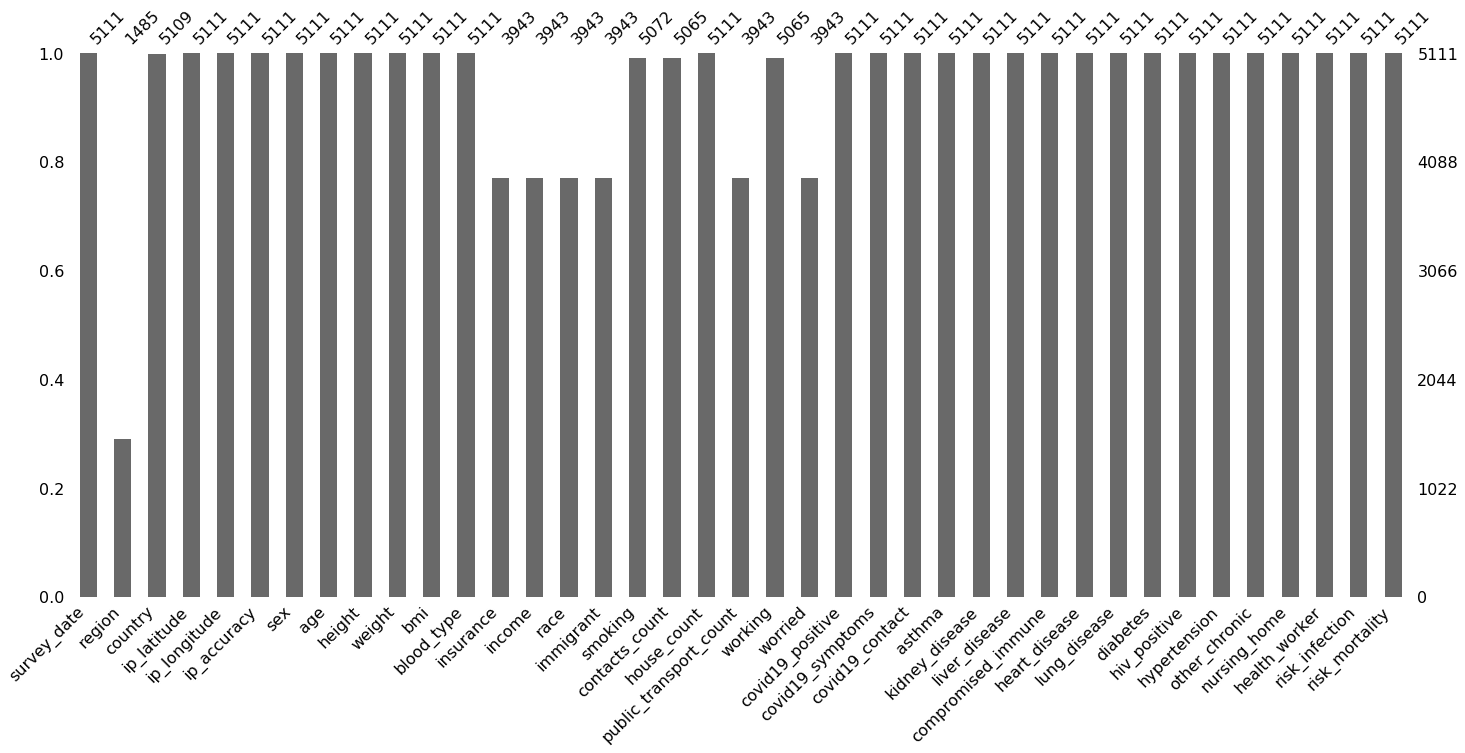

In [15]:
import missingno as msno
msno.bar(df)

From the computed barchart, we can see that 'Region' has the least filled values with only 1485 while other missing-data columns share the common figure of 3943 replies. 'Country' also is incompletely surveyed with 2 entries left empty. 

However, after examining the given CSV, we detected that 'region' column is misintepreted by the computer's algorigthm since the NA values (North American) is mistaken for Null values. To clearify our assumption, we use 'unique' function:

In [16]:
df.region.unique()

array([nan, 'EU', 'SA', 'OC', 'AS', 'AF'], dtype=object)

As you can see, the output for Region's unique values did not include North America, we need re-fill the values. But be careful, from the NEXOID's Covid19 Calculator, we can only input countries after we input our REGION values. Therefore, number of filled entries of Region column MUST be equal OR higher  that of Country column (5109 to 5111 entries).

First we need to detect how many actual missing values of REGION based on COUNTRY column:  

In [17]:
#Provide Codes here: 
df.loc[df.country.isnull()]

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
1529,2020-03-25,NaN,NaN,51.5875,-0.1807,50,male,50_60,172,96,...,1,0,1,0,1,0,0,0,100.0,0.500
2261,2020-03-07,AF,NaN,-22.5178,17.0481,1000,male,30_40,166,64,...,0,0,0,0,0,0,0,0,13.0,0.079


We can see that only 1 entry of REGION had not been filled in the original dataset (entry no 1529). The 1 missing point is too marginal to affect the general data points, therefore, we will fill it with string NA: 

We now double check it with table below: 

In [18]:
#ode

We attempted to detect data inconsistency by doing 2 things: 
    - We try to use histogram and countplot (using df.hist() and sns.countplot()) for these variables to identify if there   are any inappropriate values in the data columns. And we found that all entries are properly filled
    - We initially suspect that the BMI values might not consistently be calculated from the Height and the Weight. But ultimately, it is correctly imputed. 
##### Therefore our conclusion is that the dataset is perfectly consistent yet.

The final data issue that our team was aware of is "noise" or 'outlier'. The approach to this process is simple, we will define our own function based on mean and standard deviation of data to identify the outliers on the continuous variables. 

In [160]:
#Define by using Z score 
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


For example, the number of outliers in Height column can be detected as following: 

In [20]:
height_out=detect_outlier(df['height'])
print(height_out)

45


The function above displayed that there are 45 outliers among 5111 entries. Likewise, we will input other numeric columns with this function and we will have the following: 

In [133]:
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        a=detect_outlier(df[col])
        print(df[col].name+ " : " +str(a) + ' outliers')
        outliers.clear()

ip_latitude : 150 outliers
ip_longitude : 125 outliers
ip_accuracy : 205 outliers
height : 45 outliers
weight : 76 outliers
bmi : 81 outliers
contacts_count : 0 outliers
house_count : 79 outliers
public_transport_count : 84 outliers
worried : 25 outliers
covid19_positive : 0 outliers
covid19_symptoms : 0 outliers
covid19_contact : 0 outliers
asthma : 0 outliers
kidney_disease : 77 outliers
liver_disease : 48 outliers
compromised_immune : 321 outliers
heart_disease : 199 outliers
lung_disease : 125 outliers
diabetes : 432 outliers
hiv_positive : 21 outliers
hypertension : 0 outliers
other_chronic : 363 outliers
nursing_home : 46 outliers
health_worker : 314 outliers
risk_infection : 0 outliers
risk_mortality : 53 outliers
z1 : 205 outliers
ip_transform : 205 outliers
Recent_contact : 0 outliers


In [22]:
df[df['covid19_positive']==1].groupby('country')['bmi'].mean().max()

58.699999999999996

In [24]:
for name in df['country']:
    print(str(df[df['covid19_positive']==1].groupby('country')['bmi'].mean()[name]) + '  ' +  str (name))
    

30.89091653027822  US
26.649999999999995  NL
26.937662337662342  BR
40.73333333333333  CH
30.89091653027822  US
25.54  ES
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.077777777777783  AU
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
22.3  RU
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
22.2  JP
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
23.4  MT
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
30.89091653027822  US
28.633858267716537  GB
30.89091653027822  US
30.89091653027822  US
30.8909165302

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [nan] of <class 'float'>

##### 3a: What is the BMI patient from the US who is COVID-19 positive

In order to get the value of US's patients, we need to group by the values of country and bmi where countries equals US and we also need to make sure that the value of covid19_positive is 1 because we are looking for the infected people.

In [25]:
df[df['covid19_positive']==1].groupby('country')['bmi'].mean()['US']

30.89091653027822

The average BMI of US is 30.9 which is considered to be overweighted. This might show a correlation between chronic diseases and the pandemic infection in the future exploitation

###### 3b: Which country has the highest (average) risk of mortality: 

The risk of mortality rate in all countries are calculated by indexing individual nations and compute the mean of each subset. To identify the nation with highest risk, our team will rank the output in the descending order:

In [26]:
df.groupby('country')['risk_mortality'].mean().sort_values().tail(5)


country
NZ     3.143556
AM     3.291000
PT     3.603583
AD     3.994000
IT    10.031844
Name: risk_mortality, dtype: float64

As we can see from the table, Italia has the most extreme risk of fatality with 10.03, followed by AD, PT, AM and New Zealand

In [27]:
fig1=px.density_mapbox(df,lat='ip_latitude',lon='ip_longitude',hover_name='country', hover_data=['risk_mortality'],color_continuous_scale='Portland',radius=7,zoom=0, height=700)
fig1.update_layout(title='Average Risk of Morality by countries')
fig1.update_layout(mapbox_style='open-street-map')
fig1.show()

###### 3c: How many countries with at least 10 positive cases?

Categorizing the positive COVID19 cases by countries is more complex, we need to select the entries where column COVID19_POSITIVE's values equal to 1 (which means active), then we need to group by nations and count the total number of it

In [28]:
second=df[df['covid19_positive']==1].groupby('country')['covid19_positive'].count()

In [29]:
#For loop to help to list out top nations with least positive cases
for index,value in second.items():
    if (value>9):
        print(index)

BE
BR
CA
CL
ES
GB
IN
IT
MX
PK
US
ZA


In [30]:
#Put a bar graph here:

In [31]:
##### 3d. Top 5 nations with highest number of positive cases: 
second.sort_values(ascending=False).head(5)

country
US    1222
BR     154
GB     127
CA      51
IT      32
Name: covid19_positive, dtype: int64

In [32]:
#put a chart here:

## TASK 3

###### 1. Understand the distribution of variables:

For variables with nominal values, the most appropriate distribution visualisation is Histogram:

In [33]:
binary_var=df.loc[:,'covid19_positive':'health_worker']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284F2F35D08>,
      dtype=object)

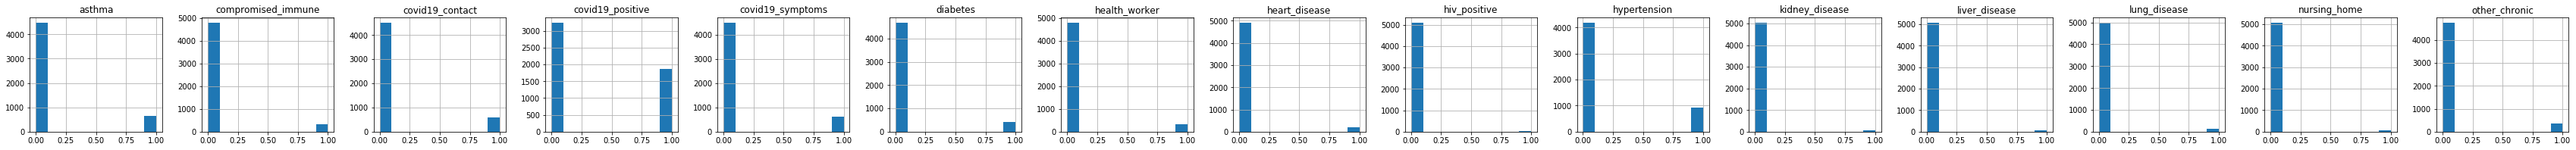

In [34]:
binary_var.hist(figsize=[60, 10], layout=[3,15])

Histograms of above variables show that, the majority of these factors have the values of 0, meaning they show the negative results for all survey questions. The column has the highest number of '1' is unfortunately Covid19_positive, this dictates that other medical conditions do not substantially impact the possibility of being infected by the pandemic. 

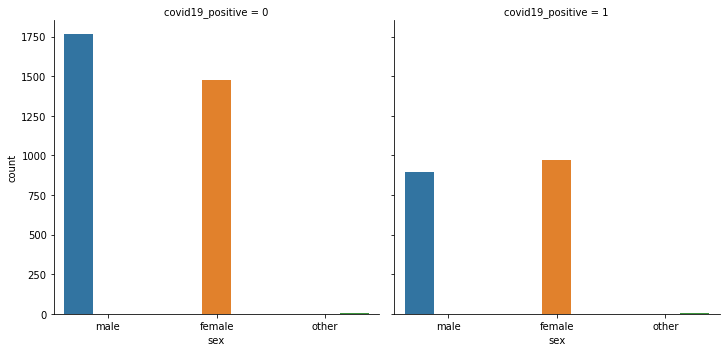

In [35]:
sns.catplot(x='sex', col='covid19_positive', data=df, kind='count',hue='sex')


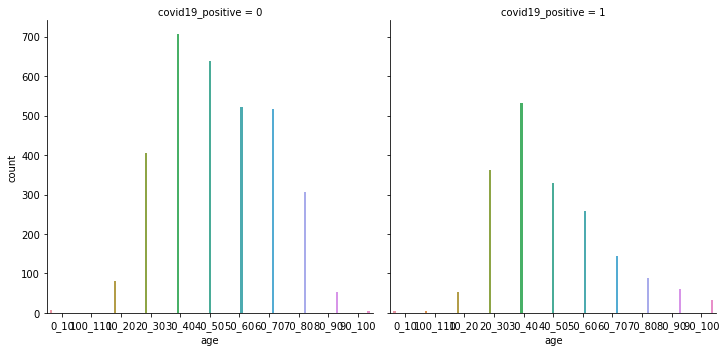

In [36]:
sns.catplot(x='age',col='covid19_positive', data=df, kind='count',hue='age')

For continuous variables, it is advised to perform boxplot to fully view the distribution of values in each variables, we can get the overall insights as max, min, median and especially Outliers. In this case study, We will eliminate 2 continuous factors: longitude and latitude. Our team only wants to understand the dispersion of other 8 factors 

Text(0.5, 1.0, 'Public Transport')

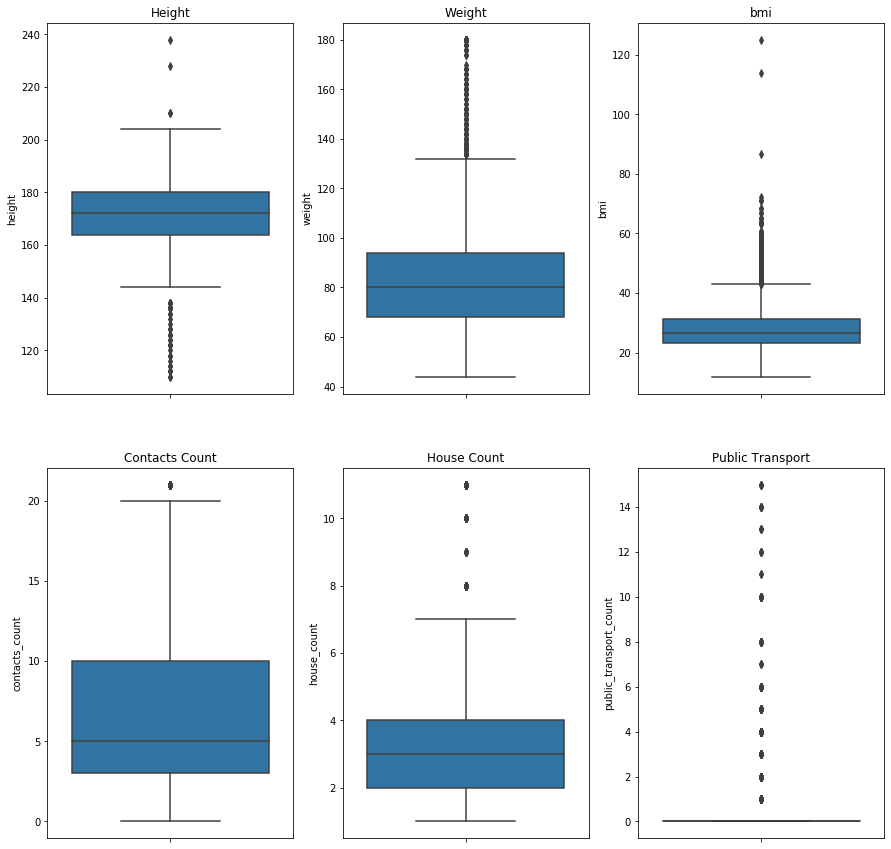

In [37]:
fig, axs = plt.subplots(2, 3,figsize=(15,15))
sns.boxplot(x='height', data=df, orient='v', ax=axs[0,0]).set_title('Height')
sns.boxplot(x='weight', data=df, orient='v', ax=axs[0,1]).set_title('Weight')
sns.boxplot(x='bmi', data=df, orient='v', ax=axs[0,2]).set_title('bmi')
sns.boxplot(x='contacts_count', data=df, orient='v', ax=axs[1,0]).set_title('Contacts Count')
sns.boxplot(x='house_count', data=df, orient='v', ax=axs[1,1]).set_title('House Count')
sns.boxplot(x='public_transport_count', data=df, orient='v', ax=axs[1,2]).set_title('Public Transport')


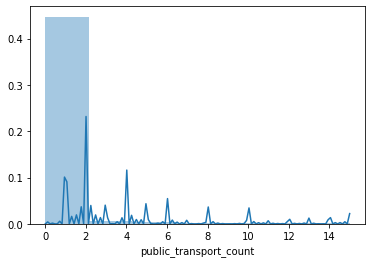

In [73]:
sns.distplot(df['public_transport_count'], bins=7)

In [70]:
df['public_transport_count'].value_counts()

0     3629
1       77
2       71
4       40
6       21
3       21
5       21
10      17
8       16
14       9
12       6
15       6
13       4
7        3
11       2
Name: public_transport_count, dtype: int64

To identify the distribution of nations in different regions, we need to use the global map to cluster the locations of web-based respondents. 
As being infered from the map, North America appears to have the most people participating the surveys, followed by Europe and South America. It is surprising to see some of huge nations with extreme warning of domestic COVID Infection (China and Russia) were not displayed in the map. 
##### if you cannot see the map below, please make sure you downloaded my "mapbox_token.txt" attached in the zip/git. 

In [39]:
mapbox_access_token=open("mapbox_token.txt").read()

In [40]:
fig2=go.Figure(go.Scattermapbox(lat=df['ip_latitude'], lon=df['ip_longitude'],mode='markers',marker=go.scattermapbox.Marker(size=9),text=df['country']))
fig2.update_layout(autosize=True,hovermode='closest',mapbox=dict(accesstoken=mapbox_access_token,bearing=0,center=dict(lat=38.92,lon=-77.07),pitch=0,zoom=10))

###### 2. Correlation between 'covid19_positive' and 'risk_infection'

Before examining the relationship of the two data, our team wants to state that: **correlation is a measure of the linear relationship between two variables**. To understand the existence of mutual dependence of these, we firstly need to categorize the variables: 'covid19_positive' is a series of **binary outcomes** (0 or 1) stating the infection status of a person and 'risk_infection' is a **continuous** variable having values ranged from 0-100 to measure the possiblity of being contracted with the virus. 
Our approach will clearly be demonstrated based on the calculation of point biserial algorithm and be illustrated with the help of scatter plot. 
Point biserial is a powerful tool, as stated in scipy documentation: 
- "The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship." (Scipy, 2020)

In [41]:
stats.pointbiserialr(df['covid19_positive'], df['risk_infection']).correlation

0.9630451752245648

##### The correlation coefficient is 0.96, showing an extremely high correlation between these variables. To specify what kind of relation and how our team will treat this case in the future, we introduce a scatter plot below:

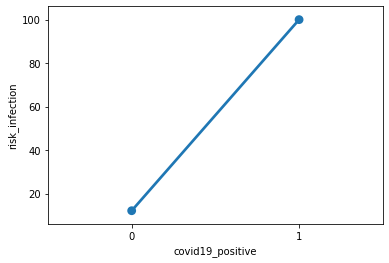

In [42]:
sns.pointplot(x='covid19_positive',y='risk_infection',data=df,kind='point')

As we see from the joint plot above, the line represented for the relationship of 2 given variables is a straight line, therefore it is certainly a linear relationship.  Nevertheless, the case seems distinct with the peculiar distribution of data points. As dictated from the chart, it shows an absolute correlation in which only produces 2 results: either negative with Covid19 or Positive with the virus. Also, it is an one-way relation: If a person is contracted with coronavirus, he/she is ensured to have 100% risk infection, if the rate is lower than that, he or she is believed to be negative with the pandemic test results, however, the vice versa cannot be true: unless the covid19 positive is one, the patient will always be negative to covid19 regardless of higher risk infection. Therefore, this is a linear dependent relationship.

In the data modelling process, the best algorithm to handle binary outcomes is logisitc regression, however, logistic models normally do not allow linear relationships. Therefore, in this case, we need to use mixed effect regression. This is a strong method  to model the probability of binary events (whether a person is definitely infected or not infected). 
There are multiple ways to deal with the kind of data, but the simplest approach will just be aggregated. To explain our team's strategy of handling these variables, the goal of this report must be restated: Is to decide if a person is contracted with virus or not and within same determining factors, we can predict the future input of respondents of their covid19 test based on the given survey. Therefore, we are allowed to completely remove the column of RISK INFECTION: Because no matter how high of a person's risk rate, he/she will still get negative result of covid19 if the rate is not 100%. So it is no point of measuring their infection possibility.

##### 3.3 Identify the highly correlated variable pairs

The heatmap below shows the correlation of variables:

In [43]:
ad2=df.select_dtypes(include=['number'])


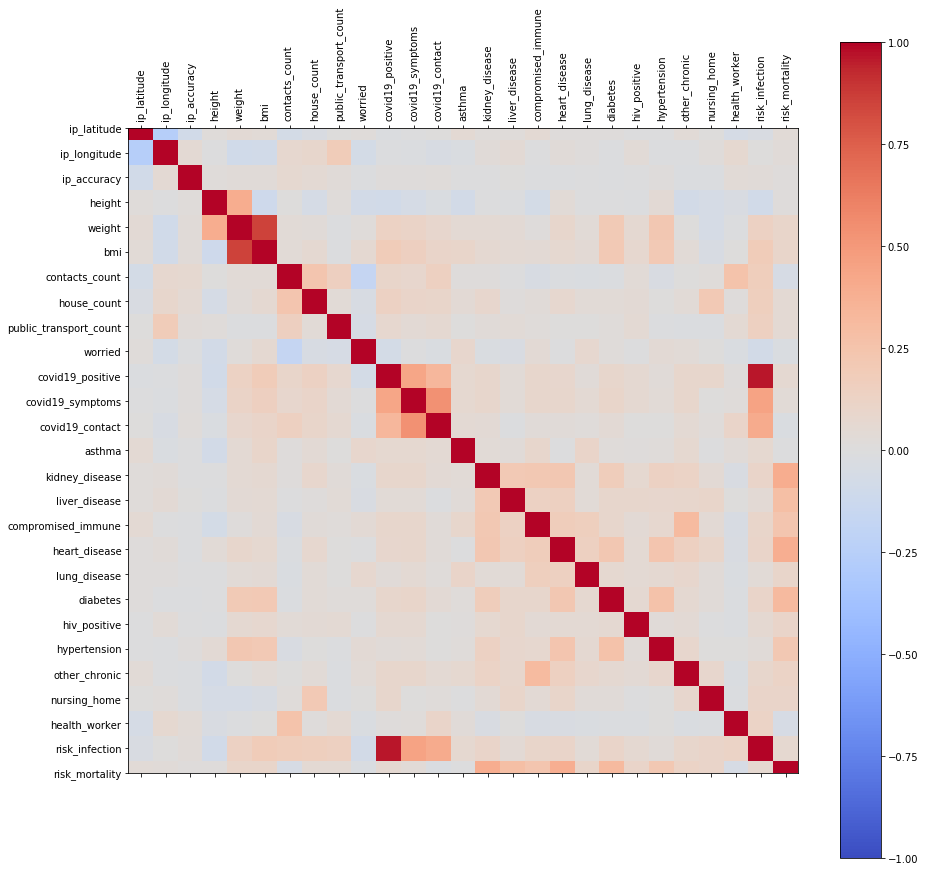

In [44]:
corr = ad2.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(ad2.columns),1) 
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(ad2.columns) 
ax.set_yticklabels(ad2.columns) 
plt.show()

As we can see from the given matrix, there are only 2 pairs of variables can be considered as "Highly Positive Correlated":
- risk_infection and covid_positive
- bmi and weight

Our approach to the first pair variables has been discussed above, we only need to view the bmi-weight relationship. Identifying highly correlated pairs is extremely important basic process in exploratory data mining tasks. The strong dependence between factors can speed up the search process. In the general aim of our report, we can use logistic regression or market basket to determine our derived variable (which is "Obesity" - will be discussed later in this report). The further handling approach will also be detailed in TASK 5. 

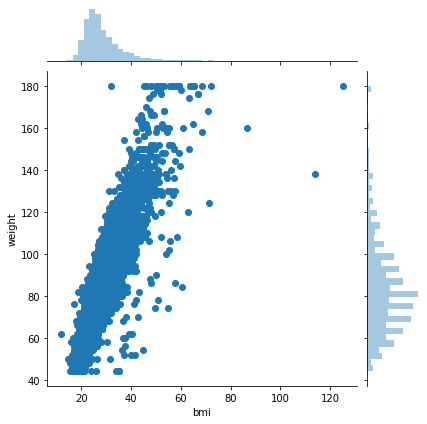

In [45]:
sns.jointplot(x='bmi',y='weight',data=df,kind='scatter')

## TASK 4 

### 4.1 and 6.2. Summarize findings based data exploraiton, explain the data preparation choice and correct it: WILL TRY TO MOVE TO PART 6

Looking at the barchart of missing values,  There are missing values in Region, Country, Insurance, Income, Race, Immigrant, Smoking, Contacts Count, Public Transportation Count, Working, Worried. Ratio of missing values in these columns are different, thus the technique of choice for fixing them will be different too. 
#### a. Handling missing data
##### Before deciding the measure to handle data imputation, we need to fully understand the background of this research. The data is collected from a serial responses from a web-based survey, by accessing to the main websites of NEXOID (The corporation created this dataset: (https://www.covid19survivalcalculator.com/ ), our team realizes that all of the above missing data columns (except Region, County and Worried) were compulsory to be filled in order to proceed the calculator of COVID19 risk rates. Though NEXOID guaranteed the confidentiality of the participants to be obligated to fullfil all information by giving them the option: "Blank". By acknowledging this procedure will help us to determine whether a variable should be removed or dropped for the future modelling. 
- **Re-import DataFrame:** Firstly, for Region column, 65% of the entry values are missing. However, we detect that it is the fault of Jupyter when importing this, it mistakes string value 'NA' for NaN values. However, if we replace the NaN value for string 'NA', we will automatically assume the value of actual missing data of this variable (this is fine since there is only actual value is missed in the dataframe, but the method will be ineffective for larger dataset with more data errors). We will fix this as following:

In [46]:
#The current values in Column Region, as we can see, there is no 'NA' - North America values:
df.region.unique()

array([nan, 'EU', 'SA', 'OC', 'AS', 'AF'], dtype=object)

In [47]:
dfr=pd.read_csv(r'Documents/D1.csv', na_values="",keep_default_na=False)
#Now we will check if the NA string return: 
dfr.region.unique()

array(['NA', 'EU', 'SA', 'OC', 'AS', 'AF', nan], dtype=object)

In [48]:
dfr.isnull().sum()

survey_date                  0
region                       1
country                      1
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_posi

- **Drop rows with missing value**s: After importing the correct form of dataset, we can drop columns of **Smoking, Contact Count, Working, Region, Country** since its low ratio of missing data does not affect significantly the analysis. We will drop rows as following:

In [49]:
fm1=['region','country']
mask=pd.isnull(dfr['region'])
for col in fm1:
    mask=mask|pd.isnull(dfr[col])
dfr=dfr[~mask]
dfr.isnull().sum()

survey_date                  0
region                       0
country                      0
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1167
income                    1167
race                      1167
immigrant                 1167
smoking                     38
contacts_count              45
house_count                  0
public_transport_count    1167
working                     45
worried                   1167
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_posi

- **Drop columns** of **Insurance, Income, Race, Immigrant, public_transport_count, Worried** due to their large missing data volumn that can mislead the modelling outcomes: 

In [50]:
dfr=dfr.drop(['insurance','income','race','immigrant','public_transport_count','worried'], axis=1)

In [51]:
dfr.isnull().sum()

survey_date            0
region                 0
country                0
ip_latitude            0
ip_longitude           0
ip_accuracy            0
sex                    0
age                    0
height                 0
weight                 0
bmi                    0
blood_type             0
smoking               38
contacts_count        45
house_count            0
working               45
covid19_positive       0
covid19_symptoms       0
covid19_contact        0
asthma                 0
kidney_disease         0
liver_disease          0
compromised_immune     0
heart_disease          0
lung_disease           0
diabetes               0
hiv_positive           0
hypertension           0
other_chronic          0
nursing_home           0
health_worker          0
risk_infection         0
risk_mortality         0
dtype: int64

- **Imputation handling missing data**: To the last 3 columns, we will fill missing values by using the majority of categorical data. However, each of variable has different solution.
    - For **smoking**, since most of participants never took cigarretes before, we can assume the missing values have identical answers, we will compute by using mean
    - For **working**, we will categorize the working status by **AGE** (because age is a good standard to decide of traveling condition). We will check that which age quantiles has the highest number of null data then we will fill them by sampling the majority working choice in that AGE quantiles.
    - For **contacts_count**, this is a continuous variable, most appropriate imputation will be MEAN function

In [173]:
#Fill in smoking: 
dfr['smoking'].fillna(dfr['smoking'].mode(), inplace=True)
#Fill in contacts_count:
dfr['contacts_count']=dfr.contacts_count.astype('Int64')
dfr['contacts_count'].fillna(dfr['contacts_count'].mean().round(), inplace=True)


AttributeError: 'DataFrame' object has no attribute 'contacts_count'

In [53]:
#Initially, we need to see which age group has the most NaN value:
grouped_dfr=dfr.groupby('age')['working'].value_counts(dropna=False)
#DataFrame the result:
x=pd.DataFrame(grouped_dfr)
#Rename and set index for indexing values later:
x.index.rename(['Age','Working'],inplace=True)
#Reset index: 
x.reset_index(inplace=True)
#Let's see which age group has the highest value: 
x[x['Working'].isnull()]

,Age,Working,working
12,10_20,NaN,1
18,20_30,NaN,15
24,30_40,NaN,13
30,40_50,NaN,3
36,50_60,NaN,5
42,60_70,NaN,3
48,70_80,NaN,1
52,80_90,NaN,3
56,90_100,NaN,1


We can see that 20_30 group age has the highest value, now we will fill our data with the mode of this group (which is 'stopped', equals to mode of the whole WORKING column)

In [54]:
dfr['smoking'].fillna(dfr['smoking'].mode(), inplace=True)

#### b. Reducing noise THIS WILL FOR TASK 6b LATER

#### c. What data are needed to correct types? 

So far in the exploratory process, everything is working fine. However, when it comes to the cleaning procedure, some features must be modified to facilitate better data preparation. 
- contact_count are currently stored in type of Float64 due to the fact that integer variable cannot have NaN values. This somehow can affect to the insight of these factors when we want to make the Mean computation, the number of objects and human cannot be in float type. Also, in case we decide to impute the missing values with the mean, this is also a problem. Therefore, our team decides that these variables should be converted to Int64 (not int64) - a nullable datatype that can store both null and integers. (We can also apply this on Worried and public_transport_count, however, the large amount of missing data makes it unnecessary to impute these variables)

## Task 5 

##### 1. Explain the choice of data mining technique: 

The beauty of data world lies in the variety of techniques and the flexibility to apply either of them. The word "most suitable" might not be correct since, the most important objective in initiating a data mining project is its formulation statement guiding a group of data practicers to keep in one track, only within a clear vision and understanding, a data scientist can  decide his/her approach toward a dataset. 

Therefore, in order to conclude the choice of technique implementation, our team wants to restate the original goal of this data collection: **is to decide if a person is contracted with coronavirus based on their information inputs.** This says our practice revolves *Predictive Analysis*. We share the same intention with NEXOID (who formulated this dataset). 

Though **Association** can be helpful in track patterns and correlations of variables, Cluster, however, based on our objective, we believe that **Classification** will be an efficient and appropriate tool assisting us to achieve desirable outputs. Within given various attributes in discernable categories, the classification will be facilitated and more ensured.
**Regression** for predicting the likelihood of being infected or fatal is also a very good choice, however, calculating the exact rate requires extended numeric variables. And from our analysis, the accuracy of regression outputs is not reliable.

For current plan, univariate/multivariate logistic regression and  analyses will be using medical risk factors as independent variables.

###### 2. Feature Selection: 

As team's focus is in Classification technique, we expect to apply Binary Classification to indicate whether a person is contracted with corona and whether he/she will be dead from the virus. The choice is inspired with a number of available binary variables collected in the dataset, all of them are fully filled, enhancing the precision of the mining process. Before listing the essential variables, the report will also introduce some derived variables that our team feel neccessary to be included in our future data mining task.
- First of all, we will formulate a column determining 'obesity' by filtering BMI over 30 and put it in binary value 0-1. Obesity is at epidemic proportions in the United States and in other developed and developing countries. The prevalence of obesity is increasing not only in adults, but especially among children and adolescents. Obesity is also strongly associated with an increased risk of all-cause mortality as well as cardiovascular and cancer mortality. Obesity must be identified to increase awareness of potential adverse outcomes. This will allow health care professionals to identify and implement appropriate interventions to reduce patient risk and mortality. The input for this variable will be from BMI.

- A new derived variable named: mortality_level - a categorical factor displaying the intesity of covid19 fatality. Due to the fact that nominal variable will make the classification process easier, encoding the risk_mortality into nominal bins will be a better option. We will divide the rate into different bins and rate them from 0-4





In [55]:
from sklearn.preprocessing import LabelEncoder
#Formulate obese column by filtering BMI value: 
dfr['obese']=dfr['bmi']>30
#For future Predictive Modeling, it is essential to convert boolean values into numeric type 0-1: 
number = LabelEncoder()
dfr['obese']=number.fit_transform(dfr['obese'].astype('str'))

Our list of selected variables for this data mining task includes:
- BMI: Because on the medical perspective, BMI can represent both Height and Weight to decide a person's fitness condition, moreover, BMI as discussed, is the input of Obese
- Obese,asthma, kidney_disease, liver_disease, compromised_immune, heart_disease, lung_disease, diabities, hiv_positive, hypertension, other_chronic, age, sex: A significant medical risk association with different age groups in term of genders needs to be defined to identify if pre-existing comorbidities in different demographics can affect the likelihood of developing the corona disease
- Covid_positive, covid_symptom, covid_contact: risk_infection will be redundant as explained in Task 3. covid_symptom and covid_contact are important to decide if a person is contracted with the virus

## Task 6

##### 1. Using z-score and min-max to normalize variables

As we can see, Min-Max ensures that all features will share the exact same scale (from 0-1) but does not cope well with outliers
Conversely, Z-Score are more robust to out liers but normalization be on different scale. 
However, the ip_accuracy is meant to be transform into more logical measurement. Therefore, in this case, min-max is better for application

In [63]:
dfr['Z'] = (dfr['height']-dfr['height'].mean())/dfr['height'].std()

In [86]:
dfr_quant = dfr.select_dtypes(include=['number'])

In [85]:
dfr.isnull().sum()

survey_date            0
region                 0
country                0
ip_latitude            0
ip_longitude           0
ip_accuracy            0
sex                    0
age                    0
height                 0
weight                 0
bmi                    0
blood_type             0
smoking               37
contacts_count         0
house_count            0
working               45
covid19_positive       0
covid19_symptoms       0
covid19_contact        0
asthma                 0
kidney_disease         0
liver_disease          0
compromised_immune     0
heart_disease          0
lung_disease           0
diabetes               0
hiv_positive           0
hypertension           0
other_chronic          0
nursing_home           0
health_worker          0
risk_infection         0
risk_mortality         0
obese                  0
Z                      0
dtype: int64

In [92]:
dfr_quantdrop=dfr_quant.drop(['ip_longitude','ip_latitude'], axis=1)

### Max-Min techniques

In [107]:
minmax=dfr_quantdrop.dropna().transform(min_max_transformation)

### Z-Score technique

In [101]:
from scipy.stats import zscore
z_score=m.apply(zscore)

In [99]:
m=dfr_quantdrop.dropna()
m['contacts_count']=m['contacts_count'].astype('int')
m.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5110
Data columns (total 25 columns):
ip_accuracy           5110 non-null int64
height                5110 non-null int64
weight                5110 non-null int64
bmi                   5110 non-null float64
contacts_count        5110 non-null int32
house_count           5110 non-null int64
covid19_positive      5110 non-null int64
covid19_symptoms      5110 non-null int64
covid19_contact       5110 non-null int64
asthma                5110 non-null int64
kidney_disease        5110 non-null int64
liver_disease         5110 non-null int64
compromised_immune    5110 non-null int64
heart_disease         5110 non-null int64
lung_disease          5110 non-null int64
diabetes              5110 non-null int64
hiv_positive          5110 non-null int64
hypertension          5110 non-null int64
other_chronic         5110 non-null int64
nursing_home          5110 non-null int64
health_worker         5110 non-null int64
risk_infe

### Aggregation


In [130]:
dfr['Recent_contact']= dfr['contacts_count']+dfr['house_count']
dfr=dfr.drop(['contacts_count','house_count'], axis=1)

In [131]:
dfr

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality,obese,Z,Recent_contact
0,25/03/2020,NA,US,33.9031,-118.1494,500,male,50_60,184,80,...,0,0,0,0,0,100.0,0.194,0,1.099882,13
1,26/03/2020,EU,NL,52.0218,4.5357,5,female,80_90,164,84,...,0,1,0,0,0,100.0,3.483,1,-0.720371,9
2,28/03/2020,SA,BR,-26.8740,-48.7028,10,female,20_30,170,64,...,0,0,0,0,0,100.0,0.050,0,-0.174295,11
3,27/03/2020,EU,CH,47.1921,8.1766,20,male,90_100,132,124,...,1,0,0,0,0,100.0,13.973,1,-3.632776,18
4,27/03/2020,NA,US,40.5733,-111.9107,5,male,30_40,184,118,...,0,1,1,0,0,100.0,0.116,1,1.099882,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,7/07/2020,NA,US,32.2146,-110.7915,5,female,70_80,166,66,...,0,0,0,0,0,5.0,1.496,0,-0.538346,3
5107,7/07/2020,NA,CA,43.5832,-79.3910,1,male,70_80,168,70,...,0,0,0,0,0,5.0,3.510,0,-0.356321,5
5108,8/07/2020,NA,US,30.5336,-97.7256,1,male,70_80,182,82,...,0,1,0,0,0,5.0,2.171,0,0.917856,6
5109,6/07/2020,NA,US,39.8837,-75.3197,5,male,50_60,184,80,...,0,0,0,0,0,5.0,0.557,0,1.099882,3


##### 2.Remove outliers: 

In [143]:
out=[]

mean_1 = np.mean(dfr['Recent_contact'])
std_1 =np.std(dfr['Recent_contact'])
    
 
for y in dfr['Recent_contact']:
    z_score= (y - mean_1)/std_1 
    if np.abs(z_score) > 3 or np.abs(z_score) <-3 :
        out.append(y)

In [144]:
len(outs)

19

In [174]:
for col in ['ip_latitude', 'ip_longitude', 'ip_accuracy']:
    dfr[col] = dfr[col].astype('category')
dfr['Recent_contact']=dfr['Recent_contact'].astype('float')    

In [175]:
num_dfr = dfr.select_dtypes(include=["float"])
cat_dfr = dfr.select_dtypes(exclude=["float"])

In [177]:
idx = np.all(stats.zscore(num_dfr) < 3, axis=1)

In [178]:
dfr_cleaned = pd.concat([num_dfr.loc[idx], cat_dfr.loc[idx]], axis=1)

In [180]:
print("Before transformation: %d", dfr.shape)
print("After removing outliers: %d", dfr_cleaned.shape)

Before transformation: %d (5110, 34)
After removing outliers: %d (4961, 34)


Now we convert the above variable back to normal:

In [182]:
for col in ['ip_latitude', 'ip_longitude', 'ip_accuracy']:
    dfr_cleaned[col] = dfr_cleaned[col].astype('float')
dfr_cleaned['Recent_contact']=dfr_cleaned['Recent_contact'].astype('int')  

In [183]:
dfr_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 5110
Data columns (total 34 columns):
bmi                   4961 non-null float64
risk_infection        4961 non-null float64
risk_mortality        4961 non-null float64
Z                     4961 non-null float64
Recent_contact        4961 non-null int32
survey_date           4961 non-null object
region                4961 non-null object
country               4961 non-null object
ip_latitude           4961 non-null float64
ip_longitude          4961 non-null float64
ip_accuracy           4961 non-null float64
sex                   4961 non-null object
age                   4961 non-null object
height                4961 non-null int64
weight                4961 non-null int64
blood_type            4961 non-null object
smoking               4926 non-null object
working               4919 non-null object
covid19_positive      4961 non-null int64
covid19_symptoms      4961 non-null int64
covid19_contact       4961 non-

In [187]:
dfr_cleaned.to_csv('D1_processed_group29.csv') 

## 6.3 Data Partrition 

In [184]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [193]:
train, test = train_test_split(dfr_cleaned, test_size=0.228)

Data partrition is a technique to evaluate the accuracy and confidence of a dataset within the support of machine learning algorithm. 
It can be used in both classification and regression or any other supervised learning algorithm.
We need to split our dataset into 2 piles: the bigger one called Train Set – Used for machine building model, and other is Test set to used for testing the validation of the model. 
To determine how much of partition we want to compute, let’s rewind to the top of our report. 
We see that all missing values (1168 values) are being missed at the same places, and if we re-direct to the official website of NEXOID: those variables are not supposed to leave blank. Therefore, we believe the missing type here is MNAR (Missing not at random). This might be in the intention of creating this dataset, although in our project we dropped those column, using this hint as a clue for splitting data is indeed useful. Hence we will Split our data set into 77.2% for Training set and 22.8% for Test set.


In [194]:
train.shape

(3829, 34)

In [195]:
test.shape

(1132, 34)